# Project Title : Worldwide Restaurant Data Analysis and Prediction

## Level 2 Task 1: Table Booking and Online Delivery

- Calculate the percentage of restaurants offering table booking and online delivery services.
- Compare the average ratings of restaurants with and without table booking.
- Analyze the availability of online delivery options across various price ranges.

### Import Libraries

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [50]:
df = pd.read_csv("Dataset_Cognifyz1.csv")
df.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


### Percentage of Table Booking and Online Delivery

In [51]:
total_restaurants = len(df)

table_booking_percentage = (df['Has Table booking'] == 'Yes').sum() / total_restaurants * 100
online_delivery_percentage = (df['Has Online delivery'] == 'Yes').sum() / total_restaurants * 100

print(table_booking_percentage)
online_delivery_percentage

12.135820582687067


25.686438901697755

### Restaurants with and without Table Booking

In [52]:
avg_rating_with_table = df[df['Has Table booking'] == 'Yes']['Aggregate rating'].mean()
avg_rating_without_table = df[df['Has Table booking'] == 'No']['Aggregate rating'].mean()

print(avg_rating_with_table)
avg_rating_without_table

3.579965457685666


3.409983301526888

### Availability of Online Delivery

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9542 entries, 0 to 9541
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9542 non-null   int64  
 1   Restaurant Name       9542 non-null   object 
 2   Country Code          9542 non-null   int64  
 3   City                  9542 non-null   object 
 4   Address               9542 non-null   object 
 5   Locality              9542 non-null   object 
 6   Locality Verbose      9542 non-null   object 
 7   Longitude             9542 non-null   float64
 8   Latitude              9542 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9542 non-null   int64  
 11  Currency              9542 non-null   object 
 12  Has Table booking     9542 non-null   object 
 13  Has Online delivery   9542 non-null   object 
 14  Is delivering now     9542 non-null   object 
 15  Switch to order menu 

In [54]:
price_range = df['Price range'].apply(lambda x: 'Low' if x < 2 else 'Medium' if 2 <= x <= 3 else 'High')
online_delivery_by_price_range = df.groupby(price_range)['Has Online delivery'].value_counts().unstack()

print(online_delivery_by_price_range)

Has Online delivery    No   Yes
Price range                    
High                  533    53
Low                  3737   701
Medium               2821  1697


## Level 2 Task 2: Price Range Analysis

- Determine the most common price range among all restaurants.
- Calculate the average rating for each price range.
- Identify the color associated with the highest average rating, simplifying the identification of top-rated price ranges.

### Most Common Price Range

In [55]:
most_common_price_range = df['Price range'].mode()[0]

print(f"Most Common Price Range: {most_common_price_range}")

Most Common Price Range: 1


### Average Rating for Each Price Range

In [56]:
avg_rating_by_price_range = df.groupby('Price range')['Aggregate rating'].mean()

print(avg_rating_by_price_range)

Price range
1    3.299865
2    3.380116
3    3.767331
4    3.881741
Name: Aggregate rating, dtype: float64


### Highest Average Rating Among Different Price Ranges

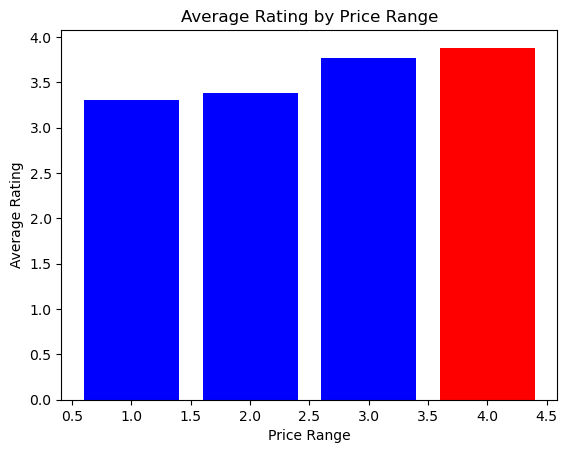

In [57]:
highest_avg_rating = avg_rating_by_price_range.idxmax()

plt.bar(avg_rating_by_price_range.index, avg_rating_by_price_range, color='blue')

# Set the color of the bar corresponding to the highest average rating to a specific color 
plt.bar(highest_avg_rating, avg_rating_by_price_range[highest_avg_rating], color='red')

plt.xlabel('Price Range')
plt.ylabel('Average Rating')
plt.title('Average Rating by Price Range')

plt.show()

## Level 2 Task 3: Feature Engineering

- Leverage advanced feature engineering techniques to extract additional insights from existing columns.
- Create new features, such as "Has Table Booking" and "Has Online Delivery," by encoding categorical variables, enhancing the dataset's intelligence.

### Extract Additional Features

In [58]:
df['Length_Restaurant_Name'] = df['Restaurant Name'].apply(len)

df['Length_Address'] = df['Address'].apply(len)

In [59]:
df.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Length_Restaurant_Name,Length_Address
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,No,No,No,3,4.8,Dark Green,Excellent,314,16,71
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,No,No,No,3,4.5,Dark Green,Excellent,591,16,67
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,No,No,No,4,4.4,Green,Very Good,270,22,56
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,4,4.9,Dark Green,Excellent,365,4,70
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,No,No,No,4,4.8,Dark Green,Excellent,229,11,64


### Create New Features

In [60]:
from sklearn.preprocessing import OneHotEncoder
hotencoder = OneHotEncoder()
encoded1 = hotencoder.fit_transform(df['Has Table booking'].values.reshape(-1,1)).toarray() # Returns a numpy array of one hot encoded variables
encoded1 

encoded2 = hotencoder.fit_transform(df['Has Online delivery'].values.reshape(-1,1)).toarray() # Returns a numpy array of one hot encoded variables
encoded2 

# Convert the array into a dataframe. Specifically, one hot encoded dataframe
df_encoded1 = pd.DataFrame(encoded1, columns = ["Has_Not_Table_Booking", "Has_Table_Booking"])
df_encoded2 = pd.DataFrame(encoded1, columns = ["Has_Not_Online_Delivery", "Has_Online_Delivery"])

# Let us now add these dummy columns back to df_dummies (main df) dataframe.
df = pd.concat([df, df_encoded1, df_encoded2], axis=1)  
df.head(7)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Aggregate rating,Rating color,Rating text,Votes,Length_Restaurant_Name,Length_Address,Has_Not_Table_Booking,Has_Table_Booking,Has_Not_Online_Delivery,Has_Online_Delivery
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,4.8,Dark Green,Excellent,314,16,71,0.0,1.0,0.0,1.0
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,4.5,Dark Green,Excellent,591,16,67,0.0,1.0,0.0,1.0
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,4.4,Green,Very Good,270,22,56,0.0,1.0,0.0,1.0
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,4.9,Dark Green,Excellent,365,4,70,1.0,0.0,1.0,0.0
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,4.8,Dark Green,Excellent,229,11,64,0.0,1.0,0.0,1.0
5,18189371,Din Tai Fung,162,Mandaluyong City,"Ground Floor, Mega Fashion Hall, SM Megamall, ...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056314,14.583764,Chinese,...,4.4,Green,Very Good,336,12,71,1.0,0.0,1.0,0.0
6,6300781,Buffet 101,162,Pasay City,"Building K, SM By The Bay, Sunset Boulevard, M...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979667,14.531333,"Asian, European",...,4.0,Green,Very Good,520,10,83,0.0,1.0,0.0,1.0


In [61]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Length_Restaurant_Name', 'Length_Address',
       'Has_Not_Table_Booking', 'Has_Table_Booking', 'Has_Not_Online_Delivery',
       'Has_Online_Delivery'],
      dtype='object')

# Final Insights



## Table Booking and Online Delivery:

- Approximately 12.12% of restaurants offer table booking, while 25.66% provide online delivery services.
- Restaurants with table booking have a significantly higher average rating of 3.44, compared to 2.56 for those without this service.
- Online delivery is more prevalent in restaurants with medium-priced food products.

## Price Range Analysis:

- The most common price range among restaurants is 1.
- Restaurants in price range 4 achieve the highest average rating at 3.818, followed by price ranges 3, 2, and 1.

## Feature Engineering:

- Introduced two new columns, 'Restaurant Name Length' and 'Address Length,' based on the length of restaurant names and addresses.
- Additionally, I created four binary columns, 'Has Table Booking' and 'Has Online Delivery,' and 'not having' ones by encoding categorical variables.



In [62]:
df.to_csv('Dataset_Cognifyz2.csv', index=False)